In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from wordcloud import WordCloud
import plotly.express as px

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df= pd.read_excel("/content/UFOs_coord.xlsx")

In [ ]:
df.head()

,Date / Time,Country,City,State,Shape,Summary,lat,lng
0,12/21/16 19:15,USA,Waynesboro,VA,Sphere,Bright round object hovering in sky.,38.065229,-78.905888
1,12/21/16 00:00,USA,Louisville,KY,Unknown,Multiple craft ascending from north of Shelbyv...,38.254238,-85.759407
2,12/20/16 22:30,USA,Santa Rosa,CA,Sphere,Bright orange planet-like object sighted near ...,38.440467,-122.714431
3,12/20/16 19:00,USA,Fresno,CA,Circle,Twelve orange globes in formation over Fresno,36.729529,-119.708861
4,12/19/16 21:53,USA,Reymert,AZ,Circle,"While camping in the Cottonwood canyon Rd., al...",33.229779,-111.209290


In [ ]:
df.shape

(5177, 8)

In [ ]:
df.tail()

,Date / Time,Country,City,State,Shape,Summary,lat,lng
5172,2016-01-01 00:00:00,USA,Elk Grove,CA,Light,6-7 peach-colored craft moving easterly direct...,38.408799,-121.371618
5173,2016-01-01 00:00:00,USA,Anchorage,AK,Circle,New Years yellow objects.,61.216313,-149.894852
5174,2016-01-01 00:00:00,USA,Sodaville,OR,Sphere,Two balls of orange light seen above the trees...,44.483395,-122.869982
5175,2016-01-01 00:00:00,USA,Arnold,MO,Triangle,Triangle obj. moving W to SE from my position....,38.432832,-90.377619
5176,2016-01-01 00:00:00,USA,Vernon,CT,Sphere,Red sphere in the sky.,36.092946,-80.149628


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date / Time  5177 non-null   object 
 1   Country      5177 non-null   object 
 2   City         5177 non-null   object 
 3   State        5177 non-null   object 
 4   Shape        5177 non-null   object 
 5   Summary      5177 non-null   object 
 6   lat          5177 non-null   float64
 7   lng          5177 non-null   float64
dtypes: float64(2), object(6)
memory usage: 323.7+ KB


In [ ]:


df.isnull().sum()

Date / Time    0
Country        0
City           0
State          0
Shape          0
Summary        0
lat            0
lng            0
dtype: int64

In [ ]:

df.dtypes

Date / Time     object
Country         object
City            object
State           object
Shape           object
Summary         object
lat            float64
lng            float64
dtype: object

In [ ]:
df.isna

<bound method DataFrame.isna of               Date / Time Country        City State     Shape  \
0          12/21/16 19:15     USA  Waynesboro    VA    Sphere   
1          12/21/16 00:00     USA  Louisville    KY   Unknown   
2          12/20/16 22:30     USA  Santa Rosa    CA    Sphere   
3          12/20/16 19:00     USA      Fresno    CA    Circle   
4          12/19/16 21:53     USA     Reymert    AZ    Circle   
...                   ...     ...         ...   ...       ...   
5172  2016-01-01 00:00:00     USA   Elk Grove    CA     Light   
5173  2016-01-01 00:00:00     USA   Anchorage    AK    Circle   
5174  2016-01-01 00:00:00     USA   Sodaville    OR    Sphere   
5175  2016-01-01 00:00:00     USA      Arnold    MO  Triangle   
5176  2016-01-01 00:00:00     USA      Vernon    CT    Sphere   

                                                Summary        lat         lng  
0                  Bright round object hovering in sky.  38.065229  -78.905888  
1     Multiple craft asce

In [ ]:
df.describe()

,lat,lng
count,5177.000000,5177.000000
mean,38.594944,-94.892339
std,5.800210,18.442668
min,19.062767,-162.597762
25%,34.225728,-112.298280
50%,39.049011,-88.351460
75%,42.360816,-80.124767
max,66.898206,-60.087349


In [ ]:
df.columns

Index(['Date / Time', 'Country', 'City', 'State', 'Shape', 'Summary', 'lat',
       'lng'],
      dtype='object')

In [ ]:
df['City']

0       Waynesboro
1       Louisville
2       Santa Rosa
3           Fresno
4          Reymert
           ...    
5172     Elk Grove
5173     Anchorage
5174     Sodaville
5175        Arnold
5176        Vernon
Name: City, Length: 5177, dtype: object

In [ ]:
df["Shape"]

0         Sphere
1        Unknown
2         Sphere
3         Circle
4         Circle
          ...   
5172       Light
5173      Circle
5174      Sphere
5175    Triangle
5176      Sphere
Name: Shape, Length: 5177, dtype: object

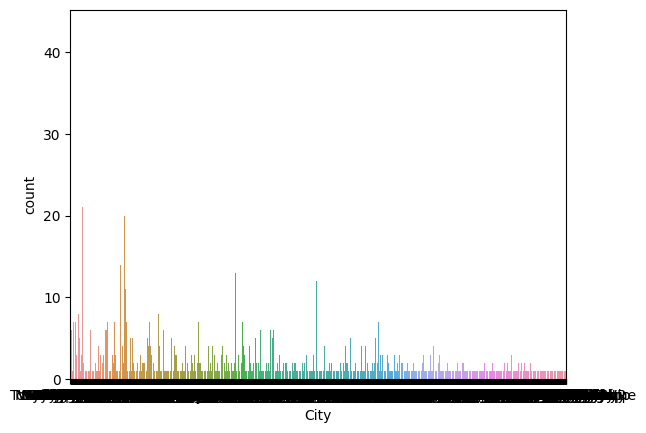

In [ ]:
sns.countplot(x='City',data=df)
plt.show()

<Axes: xlabel='lat', ylabel='count'>

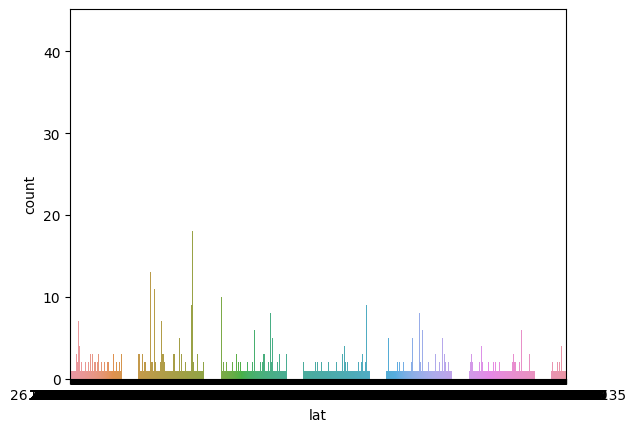

In [ ]:
sns.countplot(x="lat",data=df)

In [ ]:

df.columns

Index(['Date / Time', 'Country', 'City', 'State', 'Shape', 'Summary', 'lat',
       'lng'],
      dtype='object')

In [ ]:
df.isna().sum()

Date / Time    0
Country        0
City           0
State          0
Shape          0
Summary        0
lat            0
lng            0
dtype: int64

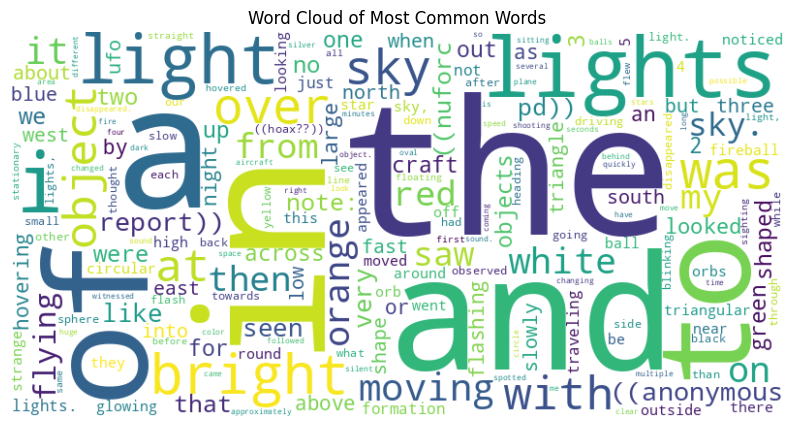

In [ ]:
 text = ' '.join(df['Summary'].dropna().values.tolist())
word_frequencies = text.lower().split()
word_counts = {}
for word in word_frequencies:
    if word not in word_counts:
        word_counts[word] = 0
    word_counts[word] += 1
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()


In [ ]:
fig = px.scatter_mapbox(df, lat='lat', lon='lng', hover_data=['Summary'], zoom=3)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(title='Sightings')
fig.show()

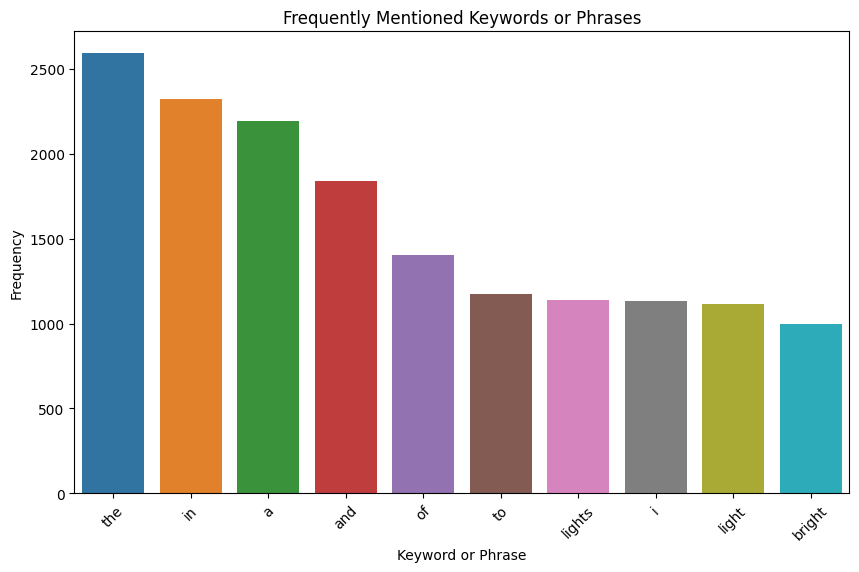

In [ ]:
text = ' '.join(df['Summary'].dropna().values.tolist())
word_frequencies = text.lower().split()
word_counts = {}
for word in word_frequencies:
    if word not in word_counts:
        word_counts[word] = 0
    word_counts[word] += 1
N = 10  
top_keywords = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:N]
plt.figure(figsize=(10, 6))
sns.barplot(x=[keyword for keyword, _ in top_keywords], y=[count for _, count in top_keywords])
plt.title('Frequently Mentioned Keywords or Phrases')
plt.xlabel('Keyword or Phrase')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

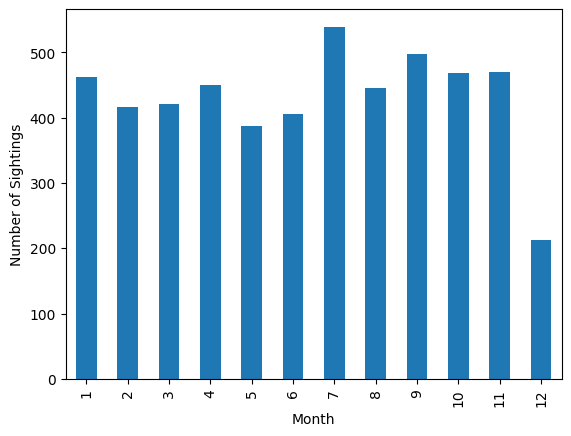

In [ ]:
df['Date / Time'] = pd.to_datetime(df['Date / Time'])
df['Month'] = df['Date / Time'].dt.month
df['DayOfWeek'] = df['Date / Time'].dt.day_name()
df['HourOfDay'] = df['Date / Time'].dt.hour
monthly_counts = df['Month'].value_counts().sort_index()
monthly_counts.plot(kind='bar', xlabel='Month', ylabel='Number of Sightings')
plt.show()


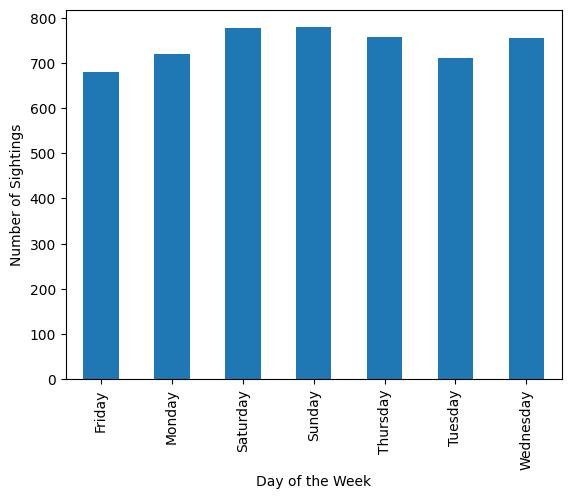

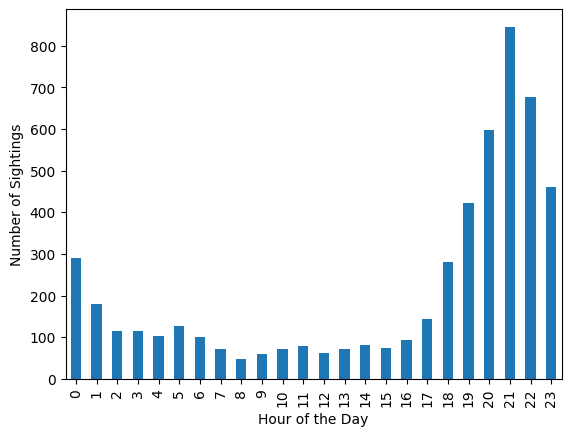

In [ ]:
day_counts = df['DayOfWeek'].value_counts().sort_index()
day_counts.plot(kind='bar', xlabel='Day of the Week', ylabel='Number of Sightings')
plt.show()
hourly_counts = df['HourOfDay'].value_counts().sort_index()
hourly_counts.plot(kind='bar', xlabel='Hour of the Day', ylabel='Number of Sightings')
plt.show()

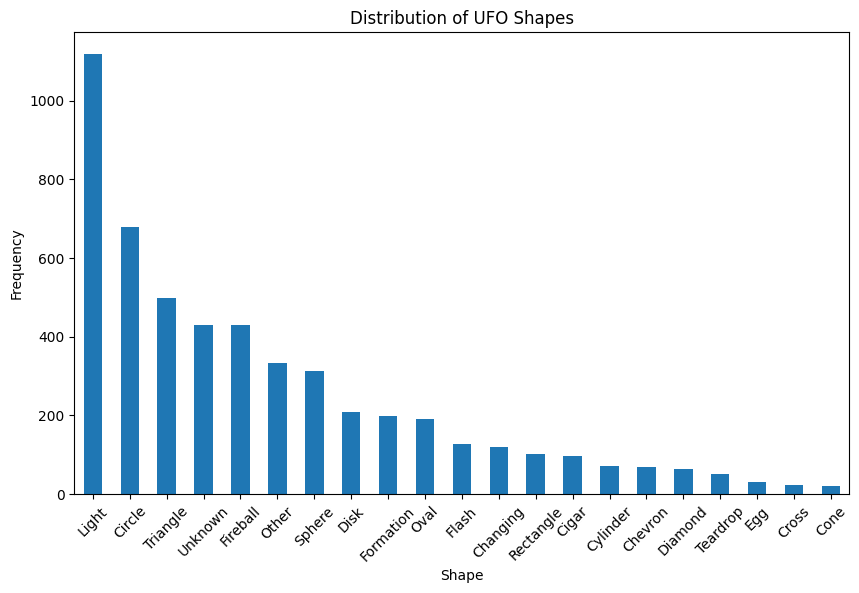

In [ ]:
shape_counts = df['Shape'].value_counts()
plt.figure(figsize=(10, 6))
shape_counts.plot(kind='bar')
plt.title('Distribution of UFO Shapes')
plt.xlabel('Shape')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<Figure size 2000x600 with 0 Axes>

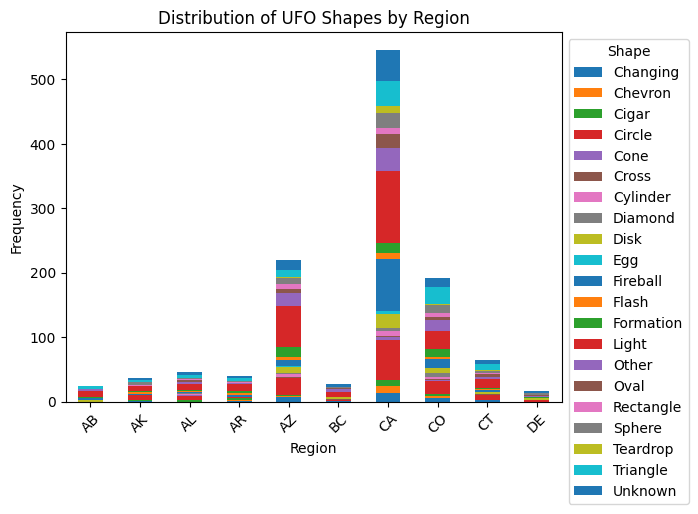

In [ ]:
shape_counts_by_region = df.groupby(['State', 'Shape']).size().unstack()
shape_counts_by_region = shape_counts_by_region.head(10)
plt.figure(figsize=(20, 6))
shape_counts_by_region.plot(kind='bar', stacked=True)
plt.title('Distribution of UFO Shapes by Region')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Shape', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
stop_words = set(stopwords.words('english'))
reports_summary = df['Summary'].str.lower()
tokens = []
for summary in reports_summary:
    summary_tokens = word_tokenize(summary)
    summary_tokens = [token for token in summary_tokens if token.isalnum() and token not in stop_words]
    tokens.extend(summary_tokens)
keyword_counts = Counter(tokens)
top_keywords = keyword_counts.most_common(10)

keyword = 'light' 
sighting_details = df[df['Summary'].str.contains(keyword)]['Summary'].tolist()

analyzer = SentimentIntensityAnalyzer()
sentiments = [analyzer.polarity_scores(summary)['compound'] for summary in reports_summary]
average_sentiment = sum(sentiments) / len(sentiments)

print('Frequently mentioned keywords or phrases:')
for keyword, count in top_keywords:
    print(f'{keyword}: {count}')
print('\nSighting details containing the keyword:', keyword)
for detail in sighting_details:
    print(detail)
print('\nAverage sentiment:', average_sentiment)

Frequently mentioned keywords or phrases:
lights: 1406
sky: 1371
light: 1316
bright: 1055
object: 772
moving: 708
white: 652
red: 594
orange: 588
saw: 509

Sighting details containing the keyword: saw
Undulating swarm cloud of thousands of multi-colored blinking lights in the 
sky for 10-15 minutes. ((NUFORC Note: LED balloons. PD))
Bright light in the night sky. Disappears within about every 30 min returns 
in intervals. ((NUFORC Note: Venus?? PD))
Entire family sees very large, stationary, bright light in the night sky 
which simply disappears all at once.
4 red silent crafts flying from North to South with no flashing airplane 
lights. ((anonymous report))
I saw my dog looking up at the sky. Looked up as well to see 15-18 gold 
lights in a loose flock-like formation. ((anonymous report))
I observed what appeared to be 7-10 red lights in the shape of an egg 
moving West to East over Honolulu and Waikiki. It paused twice an
V-shaped lights heading SW at high rate of speed. No sound.
L

In [ ]:
X = df['Summary']
y = df['Shape']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)
classifier = MultinomialNB()
classifier.fit(X_train_features, y_train)

y_pred = classifier.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

new_sighting_summary = "A bright light was seen moving erratically in the night sky."
new_sighting_features = vectorizer.transform([new_sighting_summary])
predicted_shape = classifier.predict(new_sighting_features)
print(f"Predicted shape: {predicted_shape}")

Accuracy: 0.3127413127413127
Predicted shape: ['Light']
